# Finding Optical Fiber Locations Through Polynomial Fitting

This jupyter notebook contains python code which extracts data from a root file and plots the discrete positions of optical fibers located within the hodoscope. The code then fits polynomial functions to the discrete positions and extracts:
1. Residuals of the fits (in terms of X-positons and Y-positions),
2. Combined residuals for a group of fitted fibers,
3. Coefficients of the fits and analyzes the behavior of the coefficients with increasing fiber number.

The code is was made hastly so there is a lack of proper python etiquette (class creation and functions).

#### Installing relevant python packages

We first have to install the UPROOT package to our python environment. This can be done in several ways, though I found only one to work. We could call the package using pip:

In [ ]:
pip install uproot awkward

We can also install the package using conda:

In [ ]:
conda install -c conda-forge uproot

You may find that neither of these methods work in jupyter notebook. If that is the case, you will have to install the uproot package in a python environment and use that environment to run your jupyter notebook. A video for doing this using Windows can be found using the link: https://www.youtube.com/watch?v=HK-fPBg-NOk. Once you install the relevant package you can start importing our packages and running the code.

#### Importing relevant python packages

In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Extracting data from a root file and plotting fiber locations

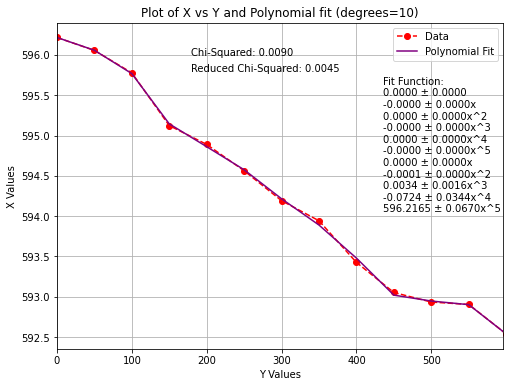

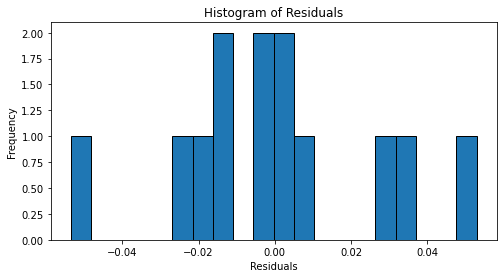

In [2]:
def main():
    # Open and prepare data from the root file
    ped_file = uproot.open("source_scan (2).root") # you will have to call this file exactly if it is not in your jupyter notebook folder
    scaler_directory = ped_file["dir_fiber"]
    key= "fiber574"
    x = scaler_directory[key].values("x")
    y = scaler_directory[key].values("y")

    # Define the desired range for x values
    y_min = 100  
    y_max = 600  

    # Filter the x and y values based on the desired range
    filtered_indices = [i for i, value in enumerate(x) if y_min <= value <= y_max]
    filtered_x = [x[i] for i in filtered_indices]
    filtered_y = [y[i] for i in filtered_indices]

    # Fit a polynomial function
    degree = 10  # Degree of the polynomial
    coefficients, covariance_matrix = np.polyfit(filtered_y, filtered_x, degree, cov=True)
    polynomial = np.poly1d(coefficients)
    fitted_x = polynomial(filtered_y)
    
    # Calculate parameter uncertainties
    parameter_uncertainties = np.sqrt(np.diag(covariance_matrix))
    
    # Calculate residuals
    residuals = filtered_x - fitted_x
    
    # Calculate degrees of freedom
    n_data = len(filtered_y)
    n_params = degree + 1  # Number of parameters in the polynomial fit
    degrees_of_freedom = n_data - n_params
    
    # Calculate chi-squared and reduced chi-squared
    chi_squared = np.sum(residuals**2)
    reduced_chi_squared = chi_squared / degrees_of_freedom
    
    # Customize the plot
    plt.figure(figsize=(8, 6))  
    plt.plot(filtered_y, filtered_x, linestyle="--", marker="o", color="r", label="Data")
    plt.plot(filtered_y, fitted_x, linestyle="-", color="purple", label="Polynomial Fit")
    
    plt.xlabel("Y Values")  
    plt.ylabel("X Values")  
    plt.title("Plot of X vs Y and Polynomial fit (degrees=10)")  
    plt.xlim(y_min, y_max) 
    plt.xlim(0, max(filtered_x))  
    plt.grid(True)  
    plt.legend()  
    
    # Display the fit function equation with parameter uncertainties
    equation_text = "Fit Function:\n"
    equation_text += "{:.4f} ± {:.4f}\n".format(coefficients[0], parameter_uncertainties[0])
    equation_text += "{:.4f} ± {:.4f}x\n".format(coefficients[1], parameter_uncertainties[1])
    equation_text += "{:.4f} ± {:.4f}x^2\n".format(coefficients[2], parameter_uncertainties[2])
    equation_text += "{:.4f} ± {:.4f}x^3\n".format(coefficients[3], parameter_uncertainties[3])
    equation_text += "{:.4f} ± {:.4f}x^4\n".format(coefficients[4], parameter_uncertainties[4])
    equation_text += "{:.4f} ± {:.4f}x^5\n".format(coefficients[5], parameter_uncertainties[5])
    equation_text += "{:.4f} ± {:.4f}x\n".format(coefficients[6], parameter_uncertainties[6])
    equation_text += "{:.4f} ± {:.4f}x^2\n".format(coefficients[7], parameter_uncertainties[7])
    equation_text += "{:.4f} ± {:.4f}x^3\n".format(coefficients[8], parameter_uncertainties[8])
    equation_text += "{:.4f} ± {:.4f}x^4\n".format(coefficients[9], parameter_uncertainties[9])
    equation_text += "{:.4f} ± {:.4f}x^5".format(coefficients[10], parameter_uncertainties[10])
    plt.text(0.73, 0.42, equation_text, transform=plt.gca().transAxes)

    # Display chi-squared and reduced chi-squared values
    chi_squared_text = "Chi-Squared: {:.4f}".format(chi_squared)
    reduced_chi_squared_text = "Reduced Chi-Squared: {:.4f}".format(reduced_chi_squared)

    plt.text(0.3, 0.9, chi_squared_text, transform=plt.gca().transAxes)
    plt.text(0.3, 0.85, reduced_chi_squared_text, transform=plt.gca().transAxes)
    
    # Create histogram of residuals
    plt.figure(figsize=(8, 4))
    plt.hist(residuals, bins=20, edgecolor='black')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")

    plt.show()

if __name__ == "__main__":
    main()

## Plotting the residuals of a range of fitted polynomials

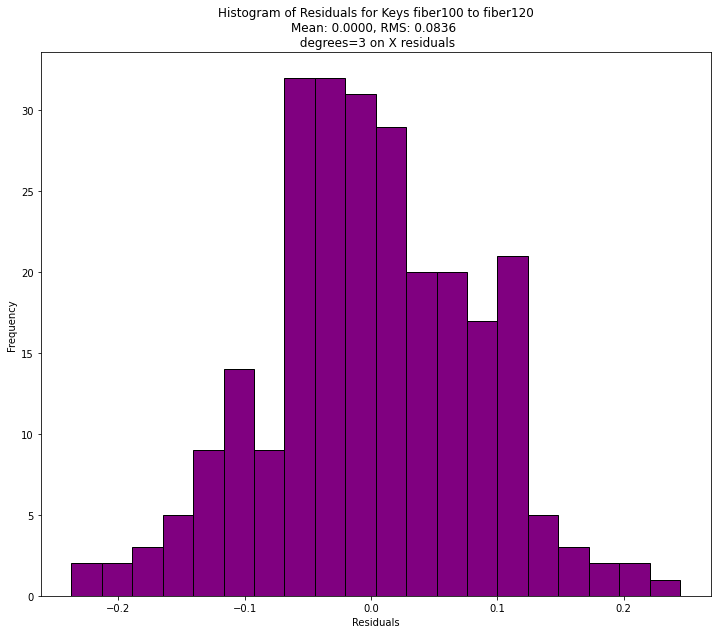

In [3]:
def main():
    ped_file = uproot.open("source_scan (2).root")
    scaler_directory = ped_file["dir_fiber"]

    # Define the desired range of keys
    start_key = 100
    end_key = 120

    residuals = []

    # Iterate over the keys and calculate residuals
    for i in range(start_key, end_key + 1):
        key = "fiber{}".format(i)
        x = scaler_directory[key].values("x")
        y = scaler_directory[key].values("y")

        # Fit a polynomial function
        degree = 3  # Degree of the polynomial
        coefficients = np.polyfit(y, x, degree)
        polynomial = np.poly1d(coefficients)
        fitted_x = polynomial(y)

        # Calculate residuals for the current key
        current_residuals = x - fitted_x
        residuals.extend(current_residuals)

    # Convert residuals to a numpy array
    residuals = np.array(residuals)

    # Calculate mean and root-mean-square (RMS) values
    mean = np.mean(residuals)
    rms = np.sqrt(np.mean(residuals**2))

    # Plot the histogram of residuals
    plt.figure(figsize=(12, 10))
    plt.hist(residuals, bins=20, color='purple', edgecolor='black')
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals for Keys fiber{} to fiber{}\nMean: {:.4f}, RMS: {:.4f} \n degrees=3 on X residuals".format(start_key, end_key, mean, rms))

    plt.show()

if __name__ == "__main__":
    main()


## Finding the mean value and RMS of the above histogram for a range of polynomial degrees

In [4]:
def main():
    ped_file = uproot.open("source_scan (2).root")
    scaler_directory = ped_file["dir_fiber"]

    # Define the desired range of keys
    start_key = 100
    end_key = 120

    degrees = [3, 5, 10]  # Different degrees to try

    results = []

    # Iterate over the degrees
    for degree in degrees:
        residuals = []

        # Iterate over the keys and calculate residuals
        for i in range(start_key, end_key + 1):
            key = "fiber{}".format(i)
            x = scaler_directory[key].values("x")
            y = scaler_directory[key].values("y")

            # Fit a polynomial function
            coefficients = np.polyfit(y, x, degree)
            polynomial = np.poly1d(coefficients)
            fitted_x = polynomial(y)

            # Calculate residuals for the current key
            current_residuals = x - fitted_x
            residuals.extend(current_residuals)

        # Convert residuals to a numpy array
        residuals = np.array(residuals)

        # Calculate mean and root-mean-square (RMS) values
        mean = np.mean(residuals)
        rms = np.sqrt(np.mean(residuals**2))

        # Append results to the table
        results.append({'Degree': degree, 'Mean': mean, 'RMS': rms})

    # Create a table using pandas
    table = pd.DataFrame(results)
    table["Mean"] = table["Mean"].round(4)
    table["RMS"] = table["RMS"].round(4)

    print(table)

if __name__ == "__main__":
    main()


   Degree  Mean     RMS
0       3   0.0  0.0836
1       5   0.0  0.0718
2      10  -0.0  0.0186


/var/folders/2s/kw8zs0k50f9_1yvjvk5q51d40000gn/T/ipykernel_10052/119060445.py:50: RankWarning: Polyfit may be poorly conditioned
  main()


## Analyzing the behavior of the coefficients with increasing fiber number

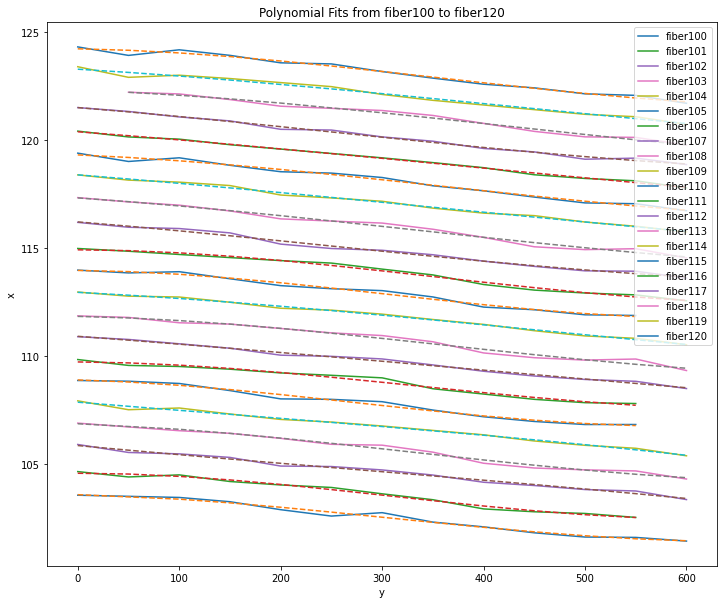

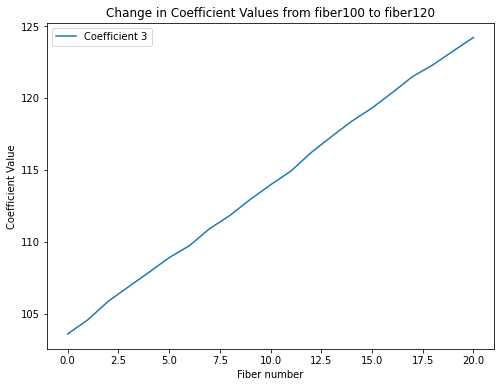

    Key  Coefficient 0  Coefficient 1  Coefficient 2  Coefficient 3
0   100   1.356044e-08      -0.000012      -0.000962     103.576704
1   101   1.833083e-08      -0.000017       0.000081     104.566828
2   102  -2.148786e-09       0.000002      -0.004374     105.849128
3   103   1.109847e-08      -0.000011      -0.001576     106.857686
4   104  -2.410089e-09       0.000001      -0.003850     107.854929
5   105   1.722695e-08      -0.000014      -0.001225     108.883682
6   106   1.390550e-08      -0.000014      -0.000235     109.716662
7   107   1.360166e-09      -0.000002      -0.003481     110.902365
8   108   1.060733e-08      -0.000012      -0.000884     111.823772
9   109   3.478595e-09      -0.000005      -0.002393     112.936093
10  110   1.745191e-08      -0.000016      -0.000344     113.949582
11  111   1.407638e-08      -0.000015      -0.000063     114.903666
12  112   5.739794e-09      -0.000004      -0.003772     116.194856
13  113   5.695334e-09      -0.000006      -0.00

In [5]:
def main():
    ped_file = uproot.open("source_scan (2).root")
    scaler_directory = ped_file["dir_fiber"]

    # Define the desired range of keys
    start_key = 100
    end_key = 120

    degrees = 3 

    # Create a list to store the coefficients for each key
    coefficients_list = []

    plt.figure(figsize=(12,10))
    # Iterate over the keys and extract the polynomial coefficients
    for i in range(start_key, end_key + 1):
        key = "fiber{}".format(i)
        x = scaler_directory[key].values("x")
        y = scaler_directory[key].values("y")

        # Fit a polynomial function
        coefficients = np.polyfit(y, x, degrees)
        coefficients_list.append(coefficients)

        # Plot the polynomial fit
        plt.plot(y, x, label=key)
        plt.plot(y, np.polyval(coefficients, y), "--")
        
    plt.legend(loc="upper right")
    plt.xlabel("y")
    plt.ylabel("x")
    plt.title("Polynomial Fits from fiber{} to fiber{}".format(start_key, end_key))
    plt.show()

    # Create a table
    table_columns = ["Key", "Coefficient 0", "Coefficient 1", "Coefficient 2", "Coefficient 3"]
    table_data = []
    for i, key in enumerate(range(start_key, end_key + 1)):
        row = [key] + list(coefficients_list[i])
        table_data.append(row)

    table = pd.DataFrame(table_data, columns=table_columns)
    
    # Plot columns of the DataFrame
    columns_to_plot = table[["Coefficient 3"]]  # You can select the desired columns to plot here

    columns_to_plot.plot(figsize=(8, 6))
    plt.xlabel("Fiber number")
    plt.ylabel("Coefficient Value")
    plt.title("Change in Coefficient Values from fiber{} to fiber{}".format(start_key, end_key))
    plt.legend()
    plt.show()

    print(table)

if __name__ == "__main__":
    main()
    
